# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 10 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### Задача 1.

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

# ФОТО ???

количество обучаемых параметров - 7 $(w_{11}, w_{12}, b_{11}, b_{12}, w_{21}, w_{22}, b_2)$

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; \frac{1}{n}(- 2Y_i + 2 \widehat{y}(X_i))$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; u_h(x) $$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; 1 $$


Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; w_{2h} $$


Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; \frac{exp(-x)}{(1+exp(-x))^2} = \sigma(x) - \sigma^2(x) $$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; x (\sigma(w_{1h}x + b_{1h}) - \sigma^2(w_{1h}x + b_{1h}))$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; \sigma(w_{1h}x + b_{1h}) - \sigma^2(w_{1h}x + b_{1h}) $$


Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial u_h(X_i)} \frac{\partial u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

Вопспользоватся стохастическим градиентным спуском, т.е. заменить $\sum_{i=1}^n$ на $\sum_{i \in I}^{ }$, где $I = \{i_1 \dots i_k\} \sim U\{1 \dots n\}$ (с повторениями)

**Вывод:**

Теперь мы можем оптимизировать параметры нашей модели используя градиентный спуск, т.к. научились искать производные при помощи backpropagation.

In [2]:
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

---
### Задача 2.

Реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. шаблон класса задачи 4 из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html#Задача-4." target="_blank">задания 6</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [83]:
class TaskOneNeuralNetwork:
    def __init__(self, nrn_num=2, batch_size=None):
        self.batch_size = batch_size
        self.nrn_num = nrn_num  #  Кол-во нейронов в 1-м слое
        self.theta = sps.norm.rvs(size=self.nrn_num * 3 + 1)  # [w11, ..., w1h, b11, ..., b1h, w21, ..., w2h, b2]
        self.eta = 3e-2

    def __get_batch(self, n):
        return np.random.randint(0, n, self.batch_size)

    def __uh(self, x, h):
        return self.__sigma(self.theta[h] * x + self.theta[self.nrn_num + h])

    @staticmethod
    def __sigma(x):
        return 1 / (1 + np.exp(-x))

    def __get_pred(self, x):
        return (np.array([self.__uh(x, h) for h in range(self.nrn_num)]).T *
                self.theta[self.nrn_num * 2:self.nrn_num * 3]).sum(axis=1) + self.theta[self.nrn_num * 3]

    def __duh_dw1h(self, x, h):
        return x * (self.__uh(x, h) - self.__uh(x, h) ** 2)

    def __duh_db1h(self, x, h):
        return self.__uh(x, h) - self.__uh(x, h) ** 2

    def __dyxi_duh(self, h):
        return self.theta[self.nrn_num * 2 + h]

    def __dmse_dyxi(self, x, y, n):
        return 2 / n * (self.__get_pred(x) - y)

    def __dmse_duh(self, x, y, n, h):
        return self.__dmse_dyxi(x, y, n) * self.__dyxi_duh(h)

    def __dyxi_dw2h(self, x, h):
        return self.__uh(x, h)

    @staticmethod
    def __dyxi_db2():
        return 1

    def __dmse_dw1h(self, x, y, n, h):
        return (self.__dmse_duh(x, y, n, h) * self.__duh_dw1h(x, h)).sum()

    def __dmse_db1h(self, x, y, n, h):
        return (self.__dmse_duh(x, y, n, h) * self.__duh_db1h(x, h)).sum()

    def __dmse_dw2h(self, x, y, n, h):
        return (self.__dmse_dyxi(x, y, n) * self.__dyxi_dw2h(x, h)).sum()

    def __dmse_db2(self, x, y, n):
        return (self.__dmse_dyxi(x, y, n) * self.__dyxi_db2()).sum()

    def __get_iterations(self, n):
        iter_sample_size = self.batch_size if self.batch_size else n
        return np.arange((n // iter_sample_size + 1) * 2)

    def fit(self, x, y):
        n = x.shape[0]
        for _ in tqdm(self.__get_iterations(n)):
            if self.batch_size is None:
                x_, y_, n_ = x, y, n
            else:
                indexes = self.__get_batch(n)
                x_, y_, n_ = x[indexes], y[indexes], self.batch_size
            grad = []
            for i in range(self.nrn_num):
                grad += [self.__dmse_dw1h(x_, y_, n_, i)]
            for i in range(self.nrn_num):
                grad += [self.__dmse_db1h(x_, y_, n_, i)]
            for i in range(self.nrn_num):
                grad += [self.__dmse_dw2h(x_, y_, n_, i)]
            grad += [self.__dmse_db2(x_, y_, n_)]
            self.theta = self.theta - self.eta * np.array(grad)

    def predict(self, x):
        return self.__get_pred(x)


Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

def compare_models(func):
    sample_size = int(1e6)
    x = sps.norm.rvs(size=sample_size)
    y = func(x)
    assert y.shape == (sample_size, )
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.4)

    model = TaskOneNeuralNetwork(batch_size=256, nrn_num=2)
    model.fit(xtrain, ytrain)
    linear_model = LinearRegression()
    linear_model.fit(xtrain.reshape(-1, 1), ytrain.reshape(-1, 1))

    nn_predict = model.predict(xtest)
    lr_predict = linear_model.predict(xtest.reshape(-1, 1)).reshape(int(sample_size * 0.4))

    plt.figure(figsize=(15, 8))
    plt.scatter(xtest, lr_predict)
    plt.scatter(xtest, nn_predict)
    plt.scatter(xtest, ytest)
    plt.legend(['лин. регрессия', 'НЕЙРОСЕТЬ', 'реальные данные'])
    plt.title('Предсказания моделей')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    print('MSE:')
    print('Наша нейросеть: ', metrics.mean_squared_error(ytest, model.predict(xtest)))
    print('Линейная регрессия', metrics.mean_squared_error(ytest.reshape(-1, 1), linear_model.predict(xtest.reshape(-1, 1))))

Обучите нейронную сеть на этих данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`.

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

  0%|          | 0/4688 [00:00<?, ?it/s]

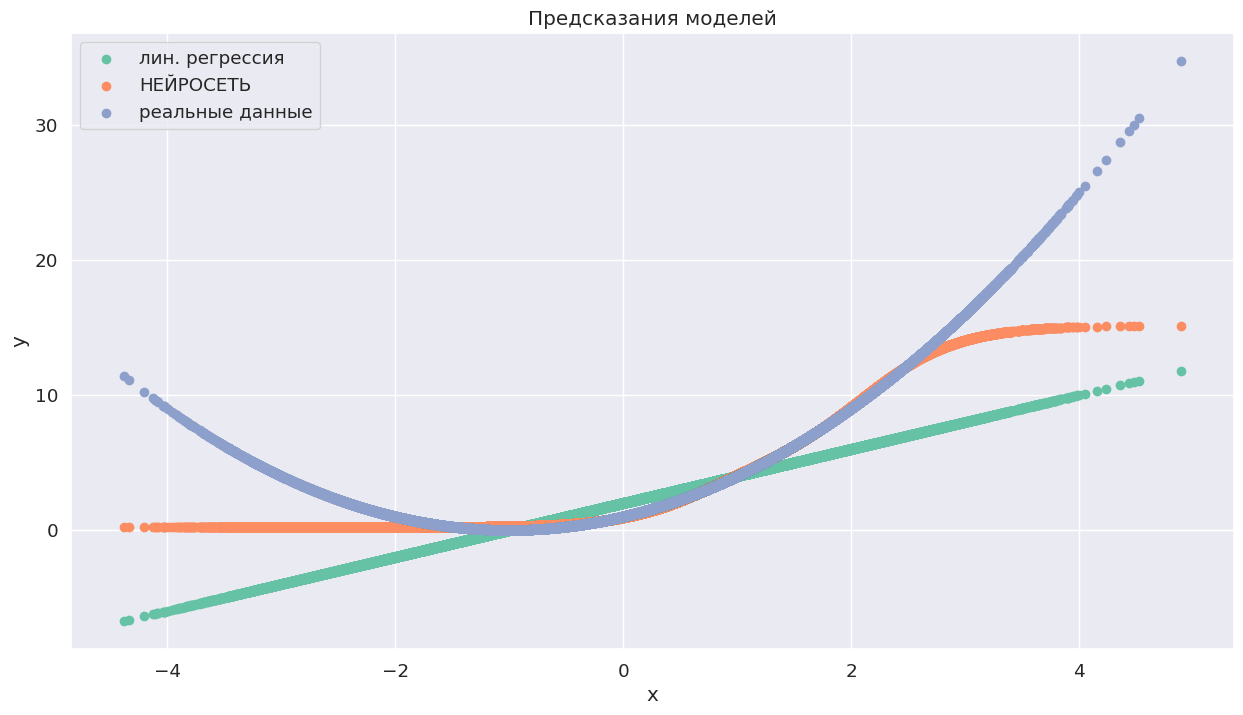

MSE:
Наша нейросеть:  0.1540363015198372
Линейная регрессия 2.0026524126587932


In [105]:
compare_models(lambda x: x ** 2 + 2 * x + 1)

Повторите вычисления для другой нелинейной функции $y(x)$.

  0%|          | 0/4688 [00:00<?, ?it/s]

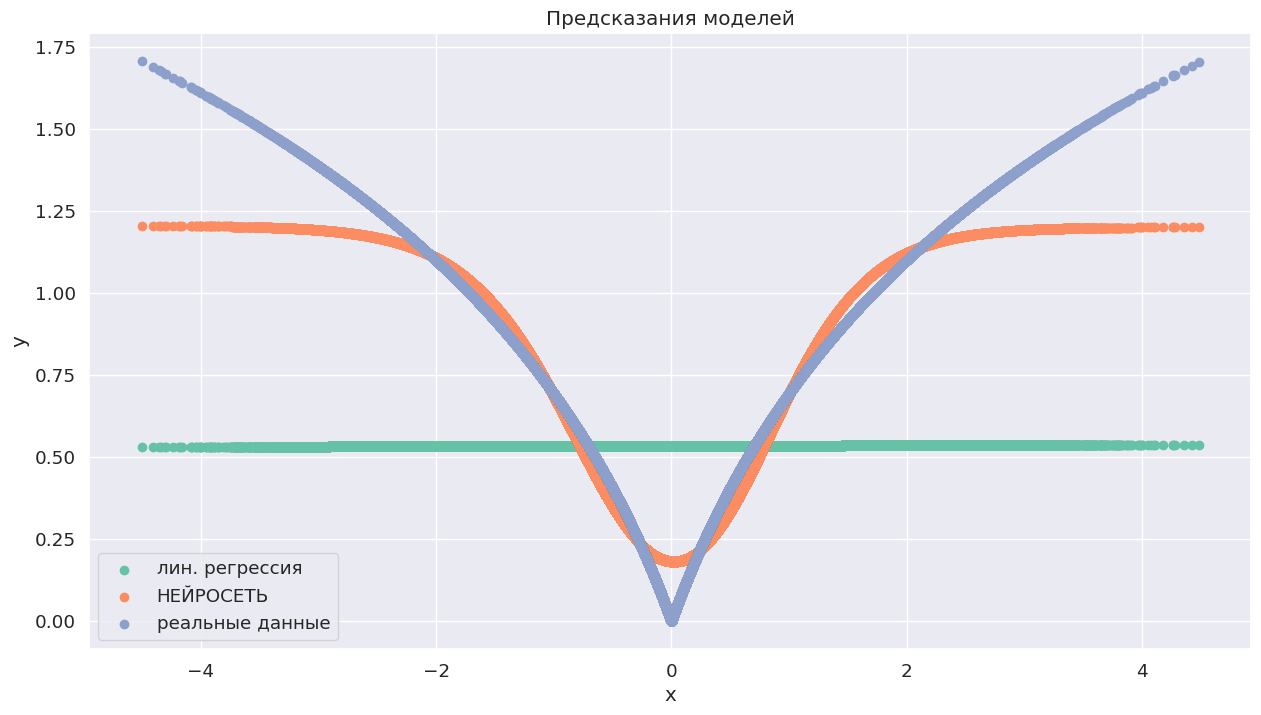

MSE:
Наша нейросеть:  0.0037730403590112366
Линейная регрессия 0.10058019988434762


In [106]:
compare_models(lambda x: np.log(np.abs(x) + 1))

По графикам видно, что наша нейросеть апроксимирует функцию значительно лучше, чем линрег.

**Вывод:**

Рализовав (стохастический) градиентый спуск при помощи backpropagation, мы научились нашей нейросетью апроксимировать простые нелинейные функции сильно лучше, чем линейной регрессией. Из графиков видно, что график предсказаний нейросети является линейной комбинацией сигмоид (функций активации). Если бы в 1 слое было больше нейронов, то нейросеть еще лучше приближала бы фукнцию.

---
### Задача 3.

Теперь напишите рассмотренную ранее нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

Обучите нейросеть на рассмотренных ранее данных. Используйте код с занятия.